## Анализ дистанций поездок такси

In [ ]:
# импорт библиотек

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. Загрузка датасета

In [ ]:
df = pd.read_csv('dip_hw_x_taxi.csv')

In [ ]:
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


Датасет состоит из 2000 строк и 6 столбцов. Пропущенных значений нет.

Типы данных

Номер заказа - уникальный целочисленный тип.
День недели - закодированный день недели.
Час - номер часа.
Дистанция - вещественное значение в километрах.
Класс обслуживания - категориальный строковый тип данных.
Ответ водителя - бинарный тип данных, отражающий факт приема заказа водителем.

### 2. Описательные статистики

In [ ]:
df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


Для числовых признаков были рассчитаны среднее арифметическое, минимум, максимум, медиана (50 перцентиль), 25 и 75 перцентили.

Номера начинаются с 412 и заканчиваются 919.196. С учетом общего количества, среднего и перцентилей понятно, что данные о заказах приведены не по порядку, выборочно.

В признаках дня недели и часа выбросов нет. Неясно только, нумерация дня недели начинается с понедельника или с воскресенья, как в пакетах python.

В признаке дистанции интересны аномальные значения минимума и максимума (0,02 и 138,95, соответственно). При среднем арифметическом 26, медиане 22 и стандартном отклонении 18 эти значения кажутся выбросами.

В признаке ответа водителя аномалий нет: либо вызов принят водителем (1), либо нет (0).

### 3. Количество значений по классам

In [ ]:
df.offer_class_group.value_counts()

Premium     500
Delivery    500
Comfort     500
Economy     500
Name: offer_class_group, dtype: int64

В датасете представлены четыре класса обслуживания: премиум, доставка, комфорт и эконом. Все классы имеют по 500 наблюдений, следовательно, выборка сбалансированная.

### 4. Распределение дистанций поездок

<AxesSubplot:ylabel='Frequency'>

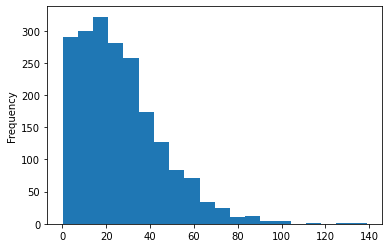

In [ ]:
df.distance_km.plot(kind='hist', bins=20)

Как было замечено при расчете описательных статистик, действительно, имеются аномалии в распределении дистанций поездок. Распределение асимметрично, с сильным скосом вправо. В среднем, дистанции поездок колеблются около 20 км. Однако есть единичные поездки на значительные расстояния: в районе 80 - 140 км.

### 5. Распределение дистанций поездок по классам

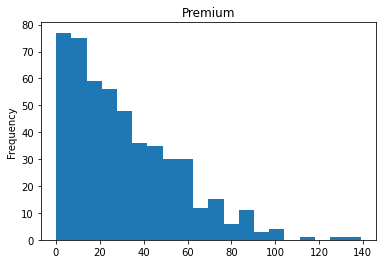

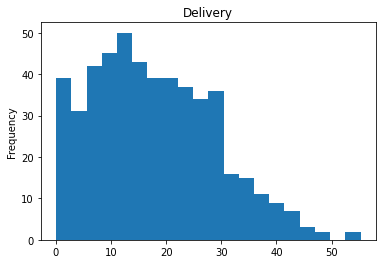

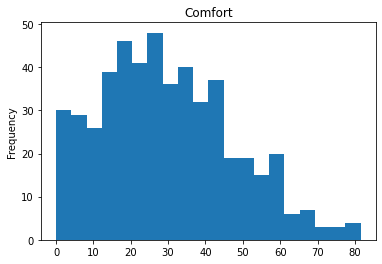

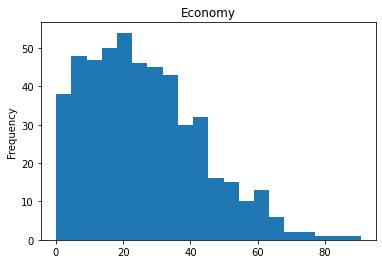

In [ ]:
for i in df.offer_class_group.unique():
    plt.figure()
    df[df['offer_class_group'] == i].distance_km.plot(kind='hist', bins=20)
    plt.title(i)

На гистограммах заметно, что распределения похожи и имеют скос справа, т.е. отдельные поеездки на дальние расстояния встречаются реже, чем короткие поездки.

Минимальные расстояния поездок приходятся на доставку (до 60 км).

Максимальные дистанции наблюдаются в классе "премиум". По гистограмме понятно, что это не "грязные" данные, а некоторый тренд: действительно, в премиум-классе было несколько десятков поездок на дальность 80 - 140 км.

В сегментах "эконом" и "комфорт" распределения дистанций поездок, в целом, похожи. Это распределения, близкие к нормальному с небольшой правосторонней асимметрией.

### 6. Дистанции эконом- и комфорт-класса

In [ ]:
df_economy = df[df['offer_class_group'] == 'Economy']
df_economy.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
11,3845,3,7,83.830,Economy,0
13,4957,3,22,14.239,Economy,1
14,5150,5,3,4.334,Economy,0
20,8758,4,17,26.413,Economy,1
21,8985,3,23,21.296,Economy,1


In [ ]:
df_comfort = df[df['offer_class_group'] == 'Comfort']
df_comfort.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,19,2.142,Comfort,1
15,6635,7,10,10.889,Comfort,1
16,7277,4,12,28.825,Comfort,1
17,7351,4,2,17.281,Comfort,0
23,9088,1,18,4.126,Comfort,0


<AxesSubplot:xlabel='distance_km', ylabel='Density'>

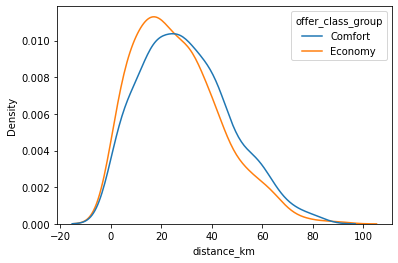

In [ ]:
sns.kdeplot(data=df[df.offer_class_group.isin(['Economy', 'Comfort'])],
           x='distance_km',
           hue='offer_class_group')

На графике ядерной плотности видно сходство распределений расстояний поездок в эконом- и кофморт-классе. Однако расстояния в комфорт-классе как будто больше, так как график чуть смещен вправо.

### 7. t-тест

Чтобы проверить гипотезу об отличиях в распределении дистанций поездок в классах "эконом" и "комфорт", проведем t-тест Стьюдента.
Предварительно проверим отличия в дисперсиях обеих выборок.

In [ ]:
np.var(df_economy.distance_km)

288.97046779239577

In [ ]:
np.var(df_comfort.distance_km)

310.71016001694375

Поскольку дисперсии отличаются незначительно, параметр "equal_var" оставляем равным True, по умолчанию.

In [ ]:
stats.ttest_ind(df_economy.distance_km, df_comfort.distance_km)

Ttest_indResult(statistic=-3.1706426042389815, pvalue=0.0015673809987275479)

### 8. Выводы

В t-тесте было получено p-value = 0,0015. Эта величина значительно меньше уровня 0,05. Следовательно, мы отвергаем нулевую гипотезу о том, что выборки одинаковы, и принимаем альтернативную гипотезу о том, что выборки статистически значимо отличаются.

### 9. Средние значения выборок

In [ ]:
df_economy.distance_km.mean()

26.283097999999978

In [ ]:
df_comfort.distance_km.mean()

29.758915999999985

In [ ]:
df_economy.distance_km.median()

23.798000000000002

In [ ]:
df_comfort.distance_km.median()

28.0785

Рассчитав показатели мер средней тенденции для двух выборок, можно сделать вывод, что в поездках на более длинные расстояния пользователи предпочитают пользоваться комфорт-классом.
Так, для комфорт-класса среднее арифметическое составило более 29 км, медиана - более 28 км, в то время как аналогичные показатели для эконом-класса - 26 км и 23 км, соответственно.